# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True) #dropped rows with values that are nonexistent for math grade 4

In [5]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **Grade 4 Math**

How many years of data are logged in our dataset? 

In [6]:
print(df["YEAR"].nunique()) #prints how many unique years their is data for

13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [7]:
state_group=df.groupby("STATE")
means=state_group["AVG_MATH_4_SCORE"].mean()
print("Michigan average: ", means["MICHIGAN"])
print("Ohio average: ", means["OHIO"])

Michigan average:  234.36363636363637
Ohio average:  239.45454545454547


In [ ]:
# thus, ohio average is higher

Find the average for your chosen test across all states in 2019

In [8]:
year_group=df.groupby("YEAR")
means=year_group["AVG_MATH_4_SCORE"].mean()
means

YEAR
1990    213.000000
1992    218.418605
1996    224.000000
2000    223.976744
2003    234.000000
2005    237.169811
2007    239.207547
2009    239.547170
2011    240.490566
2013    241.962264
2015    240.415094
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

In [29]:
# the average for 2019 us 239.9 in 2019

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [9]:
state_group=df.groupby("STATE")
maxs=state_group["AVG_MATH_4_SCORE"].max()
maxs

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [11]:
df.dropna(subset=['GRADES_ALL_G'], inplace=True)
df.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G']
df['TOTAL_EXPENDITURE_PER_STUDENT']

0        3.627221
2        5.050774
3        3.948044
4        5.164536
5        5.329154
          ...    
1219    12.553239
1220    12.538879
1221    12.495787
1222    13.313755
1223    20.507470
Name: TOTAL_EXPENDITURE_PER_STUDENT, Length: 440, dtype: float64

In [12]:
expbystategroup=df.groupby("STATE")
expbystudbystatavg=expbystategroup["TOTAL_EXPENDITURE_PER_STUDENT"].mean()
expbystudbystatavg

STATE
ALABAMA                  8.421381
ALASKA                  17.080138
ARIZONA                  6.971674
ARKANSAS                 8.796927
CALIFORNIA              10.049618
COLORADO                 9.331937
CONNECTICUT             14.276362
DELAWARE                12.617794
DISTRICT_OF_COLUMBIA    14.062380
FLORIDA                  9.217195
GEORGIA                  9.198526
HAWAII                  10.612389
IDAHO                    6.546958
ILLINOIS                12.185049
INDIANA                  9.810353
IOWA                    10.340114
KANSAS                  10.239193
KENTUCKY                 8.702852
LOUISIANA                9.261906
MAINE                   11.806347
MARYLAND                12.401227
MASSACHUSETTS           13.520292
MICHIGAN                10.816211
MINNESOTA               11.272281
MISSISSIPPI              7.558907
MISSOURI                 9.353588
MONTANA                 10.118282
NEBRASKA                10.305456
NEVADA                   8.977308
NEW_HAMP

In [13]:
df.dropna(subset=['GRADES_ALL_G'], inplace=True)
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['GRADES_ALL_G']
df['TOTAL_REVENUE_PER_STUDENT']

0        3.661510
2        4.837699
3        3.877685
4        4.997299
5        5.199137
          ...    
1219    12.354041
1220    12.611834
1221    12.536947
1222    13.410205
1223    20.723566
Name: TOTAL_REVENUE_PER_STUDENT, Length: 440, dtype: float64

In [14]:
revbystategroup=df.groupby("STATE")
revbystudbystatavg=revbystategroup["TOTAL_REVENUE_PER_STUDENT"].mean()
revbystudbystatavg

STATE
ALABAMA                  8.207739
ALASKA                  16.035768
ARIZONA                  7.027788
ARKANSAS                 8.519361
CALIFORNIA               9.952756
COLORADO                 9.122542
CONNECTICUT             14.896472
DELAWARE                12.403405
DISTRICT_OF_COLUMBIA    14.098336
FLORIDA                  8.947481
GEORGIA                  9.263988
HAWAII                  12.171112
IDAHO                    6.683557
ILLINOIS                12.090939
INDIANA                 10.100931
IOWA                    10.239471
KANSAS                  10.330449
KENTUCKY                 8.573670
LOUISIANA                9.307354
MAINE                   11.906422
MARYLAND                12.654643
MASSACHUSETTS           13.652474
MICHIGAN                10.834054
MINNESOTA               10.914199
MISSISSIPPI              7.545577
MISSOURI                 9.214548
MONTANA                 10.161062
NEBRASKA                10.501221
NEVADA                   8.697206
NEW_HAMP

In [15]:
expbyyeargroup=df.groupby("YEAR")
expbystudbyyearavg=expbyyeargroup["TOTAL_EXPENDITURE_PER_STUDENT"].mean()
expbystudbyyearavg

YEAR
1992     5.432644
2000     7.879310
2003     9.368457
2005    10.221936
2007    11.514677
2009    12.449993
2011    12.569663
2013    12.577100
2015    13.315705
Name: TOTAL_EXPENDITURE_PER_STUDENT, dtype: float64

In [16]:
revbyyeargroup=df.groupby("YEAR")
revbystudbyyearavg=revbyyeargroup["TOTAL_REVENUE_PER_STUDENT"].mean()
revbystudbyyearavg

YEAR
1992     5.368247
2000     7.847978
2003     9.203302
2005    10.230426
2007    11.559855
2009    12.262609
2011    12.576150
2013    12.601722
2015    13.414887
Name: TOTAL_REVENUE_PER_STUDENT, dtype: float64

Feature engineering justification: **I created two new columns of data. The first was the total expediture per student and the second was the total revenue per student. I then grouped these columns by state in order to see comparisons from one state to another. I then did the same two comparisons but grouped by year instead of state.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, '4th Grade Math Scores by Revenue Per Student')

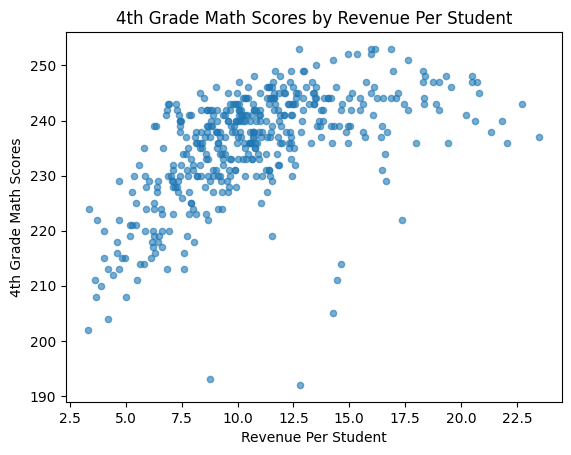

In [19]:
df.plot.scatter(x='TOTAL_REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Revenue Per Student')
plt.ylabel('4th Grade Math Scores')
plt.title('4th Grade Math Scores by Revenue Per Student')

**There is a positive relationship between the total revenue that a state receives and the math scores of 4th graders in that state for that specific year. It is important to note that this relationship is almost certain to not be a causal relationship as the revenue that a state receives does not directly impact how a student will do. This may give reason to the outliers in the plot and why there is great variation in the graph.**

**Visualization 2**

Text(0.5, 1.0, '4th Grade Math Scores by Expenditure Per Student')

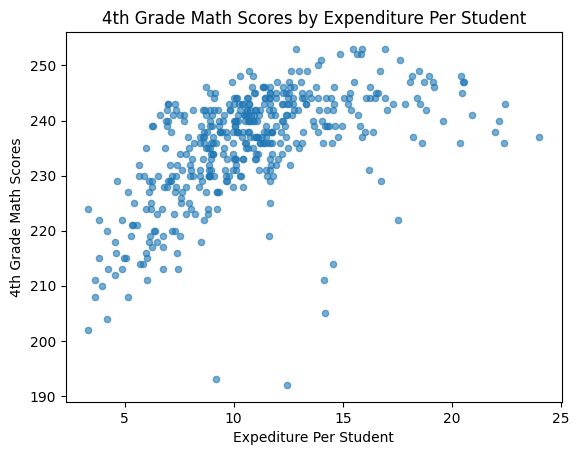

In [20]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Expediture Per Student')
plt.ylabel('4th Grade Math Scores')
plt.title('4th Grade Math Scores by Expenditure Per Student')

**The plot looks very similar to the plot above, which depicts the revenue instead of the expenditure per student graphed against the 4th grade math scores. This relationship is positive also, except this relationship is likely a causal relationship. The amount of money spend per student, or expenditure per student is likely to be spent on helping and creating resources in order for student growth and performance betterments.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
# X = input data
# y = output data
X = df[['GRADES_4_G','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# create your model here
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [29]:
model.score(X_test, y_test)

0.8606561961127084

In [30]:
np.mean(model.predict(X_test)-y_test)

0.15765958905437713

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

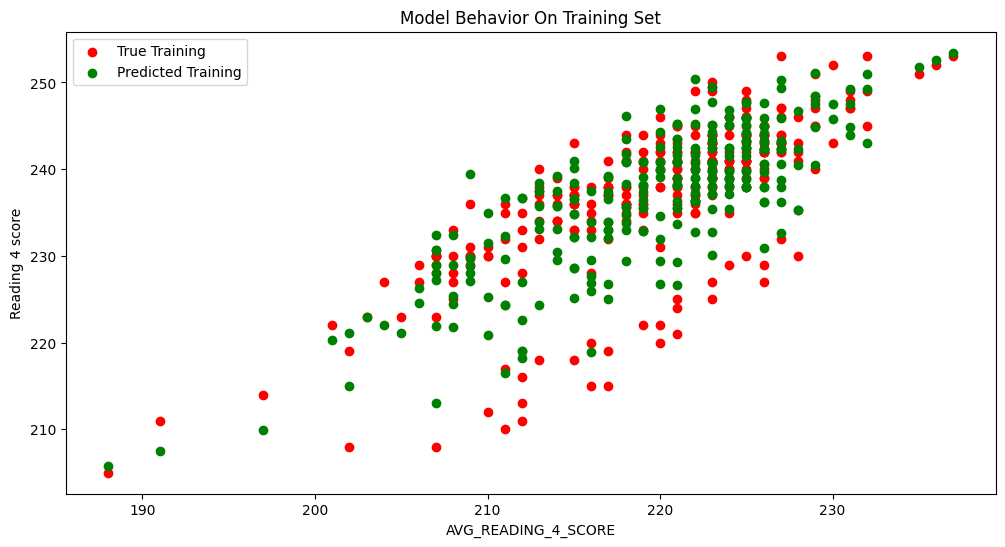

In [33]:
col_name = "AVG_READING_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Testing Set')

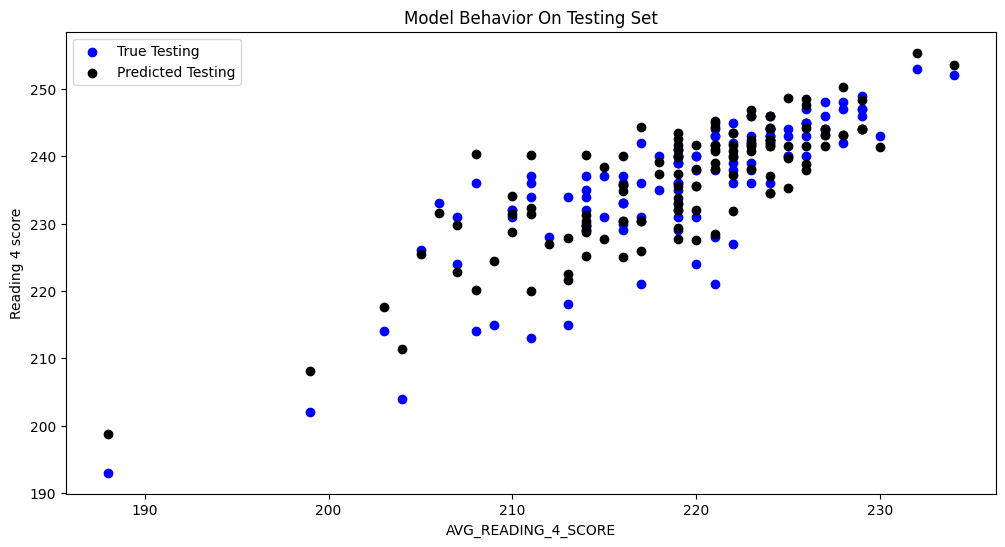

In [34]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True Testing','Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')
plt.title("Model Behavior On Testing Set")

## <h2> Summary </h2>

**My model for predicting the Math scores for 4th graders worked pretty well at predicting both the training and the testing set of the average reading scores for 4th graders. Despite the R^2 score being only around .86, when I actually plot the data, the traning and testing matches the real data pretty well.**